<a href="https://colab.research.google.com/github/2211Jarl/proj/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PRIYANKA ANANTH***

****
# TASK-2
# **PREDICTION USING UNSUPERVISED ML**
 From the given "iris" dataset, predict the optimum number of clusters and represent it visually 


# Before we start:
What is K-Means?

K-Means is an unsupervised machine learning algorithm. It attempts to classify data without having been trained with labeled data. Once the algorithm has been run and the groups have been defined, any new data can be easily assigned to the most relevant group.

**Import all necessary libraries**

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans as km
import seaborn as sus

df=pd.read_csv("/content/Iris.csv")

**To print last 5 rows of the dataset**

In [107]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**ID number of the "iris" dataset is not a feature of theirs, hence it is removed**

In [135]:
df.drop(['Id'], axis=1, inplace=True) 
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


**We also use this to find unique values available for each set of Species**

In [136]:
#to find unique value :/
print(np.unique(df['SepalLengthCm']))
print("\n",np.unique(df['SepalWidthCm']))
print("\n",np.unique(df['PetalLengthCm']))
print("\n",np.unique(df['PetalWidthCm']))
print("\n",np.unique(df['Species']))

[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]

 [2.  2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.4]

 [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]

 [0.1 0.2 0.3 0.4 0.5 0.6 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5]

 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


**Before we start to work on the dataset, we check whether there exists any null values in any columns to prevent confusion. If there exists one, we fill them with mean value of dataset.**

In [111]:
#check count of missing values
print(df.isnull().sum())
df['SepalLengthCm'].fillna(df['SepalLengthCm'].mean(),inplace=True)
df['SepalWidthCm'].fillna(df['SepalWidthCm'].mean(),inplace=True)
df['PetalLengthCm'].fillna(df['PetalLengthCm'].mean(),inplace=True)
df['PetalWidthCm'].fillna(df['PetalWidthCm'].mean(),inplace=True)
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


**We see the description of the "Iris" dataframe** 

In [110]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**To find the exact number of clusters, we use the WCSS or the Elbow Graph which gives us an idea of how many clusters might come for given dataset.**

**We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method).**

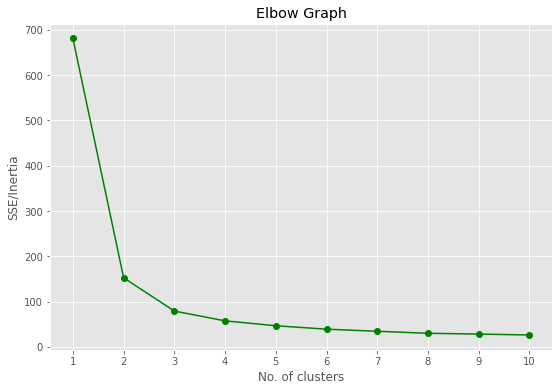

In [137]:
x=df.iloc[:,[0,1,2,3]].values

#to plot the elbow graph
inertia_values=[]
for i in range(1,11):
  model=km(n_clusters=i)
  model.fit_predict(x)
  inertia_values.append(model.inertia_)
  
#plotting the results in a line graph
plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(range(1,11), inertia_values,"-o", color="green" ) #marking the points in the graph
plt.xlabel("No. of clusters")
plt.ylabel("SSE/Inertia")
plt.title("Elbow Graph")
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

**Since there's not much of a drastic change after 3 clusters in the elbow graph we assume 3 clusters for K-means clustering in "iris" dataset.**

**Then, we create a cluster**

In [129]:
#creating a cluster
K=km(init='random',n_clusters=3,max_iter=300,random_state=10)
K.fit(x)
clusters=K.cluster_centers_
iden_clusters=K.fit_predict(x)
iden_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

**Here, we can see the properties of all species of "iris" more clearly.**


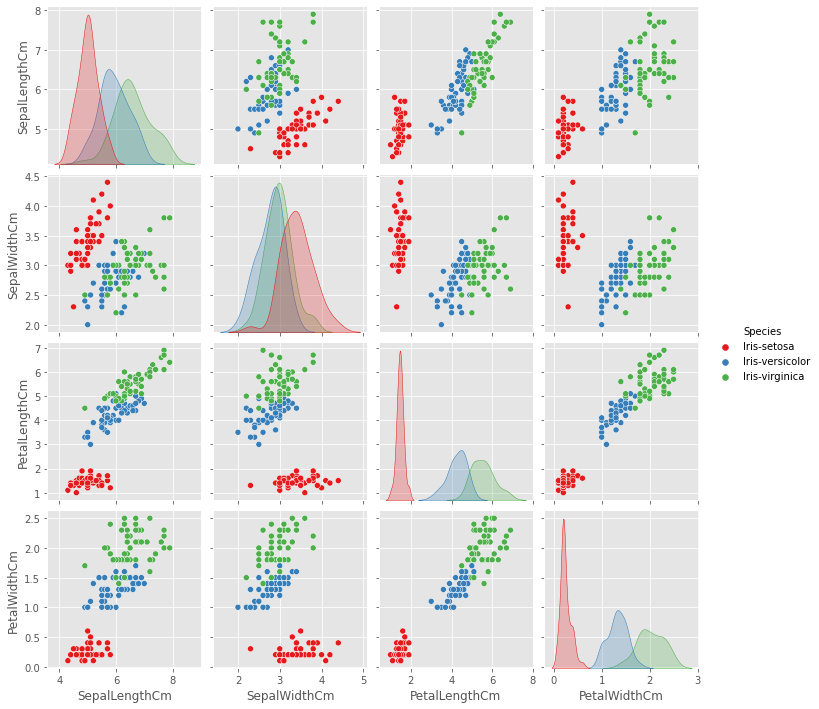

In [138]:
plt.style.use('ggplot')
sus.pairplot(data=df, hue='Species', palette='Set1')
plt.show()

**We are plotting the K-means cluster of the given "iris" dataset**

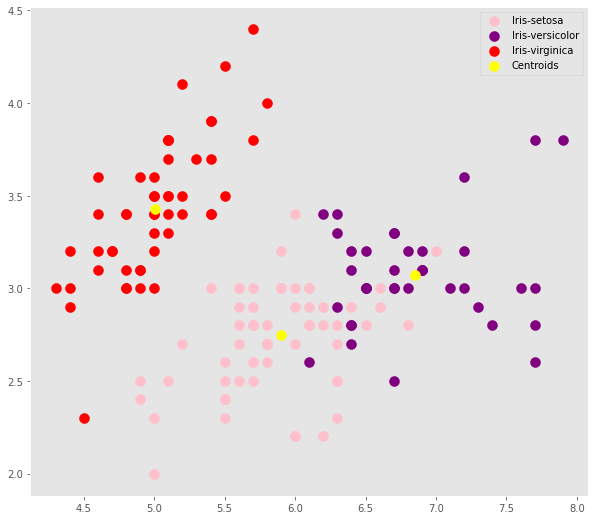

In [130]:
#plotting the graph to depict K-means clustering
plt.style.use('ggplot')
plt.figure(figsize=(10,9))
plt.scatter(x[iden_clusters==0,0],x[iden_clusters==0,1],s=100,c='pink',label='Iris-setosa')
plt.scatter(x[iden_clusters==1,0],x[iden_clusters==1,1],s=100,c='purple',label='Iris-versicolor')
plt.scatter(x[iden_clusters==2,0],x[iden_clusters==2,1],s=100,c='red',label='Iris-virginica')
plt.scatter(clusters[:, 0], clusters[:, 1], s=100, c='yellow',label='Centroids')
plt.legend()
plt.grid()
plt.show()